# Neural nets


## Introduction to NN
* Classification: MLPClassifier
* Regression: MLPRegressor

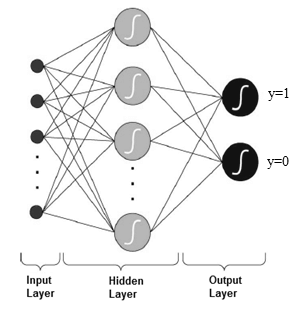

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

### MLPClassifier
**Parameters:**

MLPClassifier(hidden_layer_sizes,activation, solver,max_iter,learning_rate='constant',)

* hidden_layer_sizes:tuple, length = n_layers - 2, default=(100,) 
 The number of neurons in the ith hidden layer.
    
    hidden_layer_sizes=(5,2) means two hidden layers; 1st one with 5 neurons and the 2nd one with 2.

* activation
Activation function for the hidden layer.

    - `identity`,  $f(x) = x$
 
    - `tanh`,  $f(x) = tanh(x)$.
    - `logistic`,  $f(x) =\frac{1}{(1 + exp(-x))}$.
    - `relu`, $f(x) = max(0, x)$

* solver{'lbfgs', 'sgd', 'adam'}, default='adam'

* max_iter: int, default = 200
* learning_rate{'constant', 'invscaling', 'adaptive'}, default='constant'
    Learning rate schedule for weight updates.

    - 'constant' is a constant learning rate given by ‘learning_rate_init’.

    - 'invscaling' gradually decreases the learning rate learning_rate_ at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)

    - 'adaptive' keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.

**Attributes:**
* coef_: $w$ matrix: The ith element in the list represents the weight matrix corresponding to layer i.
* intercepts_: $\theta$ matrix. The ith element in the list represents the bias vector corresponding to layer i + 1.


**Methods:**
* fit(X,y)
* predict(X)
* predict_proba(X)


### MLPRegressor
**Parameters:**

MLPRegressor(hidden_layer_sizes,activation, solver,max_iter,learning_rate='constant')

* hidden_layer_sizes

* activation= 'relu'

* solver{'lbfgs', 'sgd', 'adam'}, default='adam'

**Attributes:**
* coef_
* intercepts_

## Example 1 of classification

In [2]:
import dmba
example_df = dmba.load_data('TinyData.csv')
example_df.head(6)

,Obs.,Fat,Salt,Acceptance
0,1,0.2,0.9,like
1,2,0.1,0.1,dislike
2,3,0.2,0.4,dislike
3,4,0.2,0.5,dislike
4,5,0.4,0.5,like
5,6,0.3,0.8,like


In [3]:
predictors = ['Fat', 'Salt']
outcome = 'Acceptance'

X = example_df[predictors]
y = example_df[outcome]
classes = sorted(y.unique())
classes

['dislike', 'like']

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(3),
                    activation='logistic', solver='lbfgs', 
                    random_state=1)
clf.fit(X, y)
clf.predict(X)

# Network structure
print('Intercepts:\n',clf.intercepts_ )


print('Weights;\n', clf.coefs_)

Intercepts:
 [array([0.13368045, 4.07247552, 7.00768104]), array([14.30748676])]
Weights;
 [array([[ -1.30656481,  -4.20427792, -13.29587332],
       [ -0.04399727,  -4.91606924,  -6.03356987]]), array([[ -0.27348313],
       [ -9.01211573],
       [-17.63504694]])]


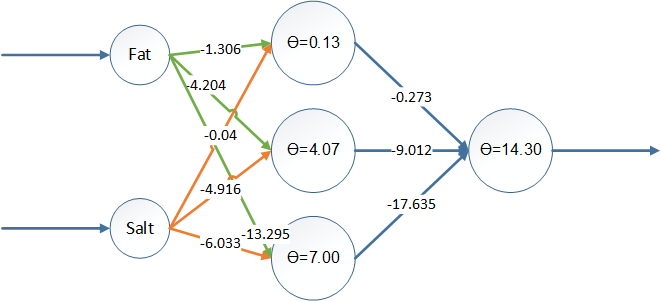

True negative:  3 False negative:  0 
False positive:  0 True positive:  3


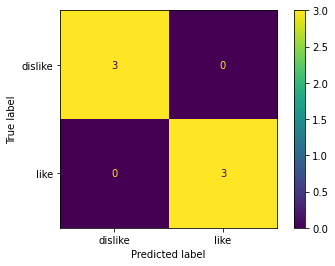

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
predicted_y= clf.predict(X)
tn, fp, fn, tp = confusion_matrix(predicted_y, y).ravel()
print('True negative: ',tn,'False negative: ', fn, '\nFalse positive: ', fp,'True positive: ',tp)
plot_confusion_matrix(clf, X, y)  
plt.show()

## Example 2 of classification

In [10]:
accidents_df = dmba.load_data('accidentsnn.csv')
accidents_df.head(5)

,ALCHL_I,PROFIL_I_R,SUR_COND,VEH_INVL,MAX_SEV_IR
0,2,0,1,1,0
1,2,1,1,1,2
2,1,0,1,1,0
3,2,0,2,2,1
4,2,1,1,2,1


Features:
* ALCHL_I: Presence (1) or absence (2) of alcohol
* PROFIL_I_R: Profile of the road way (level = 1, other = 0)
* SUR_COND: Surface condition of the road (dry = 1, wet = 2, snow/slush = 3, ice = 4, unknown = 9)
* VEH_INVL: Number of vehicles involved

Outcome
* MAX_SEV_IR: Presence of injuries/fatalities (no injury = 0, injury = 1, fatality = 2)

In [11]:
accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')

In [12]:
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')

In [13]:
processed = pd.get_dummies(accidents_df, columns=['SUR_COND']).drop(columns=['SUR_COND_9'])
processed

,ALCHL_I,PROFIL_I_R,VEH_INVL,MAX_SEV_IR,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4
0,2,0,1,0,1,0,0,0
1,2,1,1,2,1,0,0,0
2,1,0,1,0,1,0,0,0
3,2,0,2,1,0,1,0,0
4,2,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...
994,2,0,1,0,1,0,0,0
995,2,0,1,0,1,0,0,0
996,1,1,2,1,1,0,0,0
997,1,0,3,2,1,0,0,0


In [14]:
outcome = 'MAX_SEV_IR'
predictors = [c for c in processed.columns if c != outcome]

In [15]:
X = processed[predictors]
y = processed[outcome]
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [16]:
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(5,3), activation='logistic', solver='lbfgs',
                    random_state=1, max_iter=500)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 3), max_iter=500,
              random_state=1, solver='lbfgs')

Confusion matrix of training


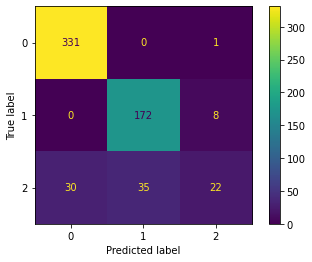

In [17]:
# training performance (use idxmax to revert the one-hot-encoding)
print("Confusion matrix of training")
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(clf,train_X, train_y)
plt.show()

Confusion matrix of testing


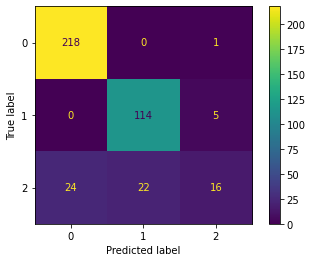

In [18]:
# validation performance
print("Confusion matrix of testing")
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(clf,valid_X, valid_y)
plt.show()

## Grid search
Exhaustive search over specified parameter values for an estimator.

`sklearn.model_selection.GridSearchCV`(estimator, param_grid, n_jobs=None, cv=None, return_train_score=False, *)
**Parameters**
* estimator: clf here
* param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values
* n_jobs:Number of jobs to run in parallel
    - None: 1 job
    - -1: using all processors
* cv: (int) Determines the cross-validation splitting strategy. 
    - None: default 5-fold cross validation
    - integer: kflod
* return_train_score= False/True
If `False`, the cv_results_ attribute will not include training scores to get insights on overfitting/underfitting. 

**Attributes**
* cv_results_: A dict with keys as column headers and values as columns,
* best_score_: Mean cross-validated score of the best_estimator
* best_params_: gaves the best results on the hold out data.

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(1), (2), (3), (4), (5)], 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', 
                                        random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8647619047619047
Best parameters:  {'hidden_layer_sizes': 1}


In [19]:
gridSearch.cv_results_

{'mean_fit_time': array([0.12933583, 0.21602235, 0.12067714, 0.1938828 , 0.36182866]),
 'std_fit_time': array([0.03442197, 0.06918239, 0.04208222, 0.09432461, 0.27599405]),
 'mean_score_time': array([0.00279441, 0.00279288, 0.00279293, 0.00398922, 0.00419436]),
 'std_score_time': array([0.00040014, 0.00039926, 0.0003988 , 0.00209026, 0.00115251]),
 'param_hidden_layer_sizes': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': 1},
  {'hidden_layer_sizes': 2},
  {'hidden_layer_sizes': 3},
  {'hidden_layer_sizes': 4},
  {'hidden_layer_sizes': 5}],
 'split0_test_score': array([0.85833333, 0.85833333, 0.86666667, 0.86666667, 0.86666667]),
 'split1_test_score': array([0.88333333, 0.86666667, 0.88333333, 0.88333333, 0.85833333]),
 'split2_test_score': array([0.86666667, 0.86666667, 0.86666667, 0.85833333, 0.86666667]),
 'split3_test_score': array([0.85833333, 0.883333

In [20]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'mean_train_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

  param_hidden_layer_sizes  mean_test_score  mean_train_score
0                        1         0.864762          0.866861
1                        2         0.864748          0.873954
2                        3         0.863081          0.873120
3                        4         0.861401          0.873954
4                        5         0.856415          0.877293


## Example 1 of regression

In [22]:
car_df = dmba.load_data('ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]
car_df.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,0,0,1,1,0,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,0,0,0,1,1,0,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,1,0,0,0,1,0,0,0,0


In [35]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', "Mfr_Guarantee",
              "Guarantee_Period","Airco","Automatic_airco", "CD_Player",
             "Powered_Windows", "Sport_Model",  "Tow_Bar"]
outcome = 'Price'
df_X=car_df[predictors]
y=car_df[outcome]

In [36]:
df_X.head(10)

,Age_08_04,KM,Fuel_Type,HP,Automatic,CC,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,23,46986,Diesel,90,0,2000,3,210,0,3,0,0,0,1,0,0
1,23,72937,Diesel,90,0,2000,3,210,0,3,1,0,1,0,0,0
2,24,41711,Diesel,90,0,2000,3,210,1,3,0,0,0,0,0,0
3,26,48000,Diesel,90,0,2000,3,210,1,3,0,0,0,0,0,0
4,30,38500,Diesel,90,0,2000,3,210,1,3,1,0,0,1,0,0
5,32,61000,Diesel,90,0,2000,3,210,0,3,1,0,0,1,0,0
6,27,94612,Diesel,90,0,2000,3,210,0,3,1,0,0,1,1,0
7,30,75889,Diesel,90,0,2000,3,210,1,3,1,0,1,1,0,0
8,27,19700,Petrol,192,0,1800,3,100,0,3,1,0,0,1,0,0
9,23,71138,Diesel,69,0,1900,3,185,0,3,1,0,0,0,0,0


In [37]:
df_X.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [40]:
df_X = pd.get_dummies(df_X, columns=['Fuel_Type']).drop(columns='Fuel_Type_Petrol')
df_X.head(10)

,Age_08_04,KM,HP,Automatic,CC,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel
0,23,46986,90,0,2000,3,210,0,3,0,0,0,1,0,0,0,1
1,23,72937,90,0,2000,3,210,0,3,1,0,1,0,0,0,0,1
2,24,41711,90,0,2000,3,210,1,3,0,0,0,0,0,0,0,1
3,26,48000,90,0,2000,3,210,1,3,0,0,0,0,0,0,0,1
4,30,38500,90,0,2000,3,210,1,3,1,0,0,1,0,0,0,1
5,32,61000,90,0,2000,3,210,0,3,1,0,0,1,0,0,0,1
6,27,94612,90,0,2000,3,210,0,3,1,0,0,1,1,0,0,1
7,30,75889,90,0,2000,3,210,1,3,1,0,1,1,0,0,0,1
8,27,19700,192,0,1800,3,100,0,3,1,0,0,1,0,0,0,0
9,23,71138,69,0,1900,3,185,0,3,1,0,0,0,0,0,0,1


In [41]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
norm_df_X=sc.fit_transform(df_X)
norm_df_X

array([[0.32835821, 0.19335471, 0.17073171, ..., 0.        , 0.        ,
        1.        ],
       [0.32835821, 0.30014938, 0.17073171, ..., 0.        , 0.        ,
        1.        ],
       [0.34328358, 0.1716468 , 0.17073171, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.92537313, 0.17113239, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.94029851, 0.16954391, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.8358209 , 0.16548628, 0.13821138, ..., 0.        , 0.        ,
        0.        ]])

In [68]:
sc=MinMaxScaler()
norm_y=sc.fit_transform(y.values.reshape(-1, 1))
norm_y[:5]

array([[0.3250444 ],
       [0.3339254 ],
       [0.3410302 ],
       [0.37655417],
       [0.3339254 ]])

In [67]:
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(norm_df_X, norm_y, 
                                                      test_size=0.4,
                                                      random_state=1)

car_lm = MLPRegressor(hidden_layer_sizes=(5,5), 
                      activation='relu', 
                      solver='lbfgs',
                      random_state=1, 
                      max_iter=500)
car_lm.fit(train_X, train_y.ravel())
# print performance measures
car_lm.score(valid_X, valid_y)

0.9114161454078082

In [70]:
param_grid = {
    'hidden_layer_sizes': [(5), (5,5),(10,3)], 
    'solver':['lbfgs'],
    'activation':['relu'],
    'max_iter':[500,1000],
}
gridSearch = GridSearchCV(MLPRegressor( ),param_grid, 
                          cv=5, n_jobs=-1,
                          return_train_score=True)
gridSearch.fit(train_X, train_y.ravel())


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [5, (5, 5), (10, 3)],
                         'max_iter': [500, 1000], 'solver': ['lbfgs']},
             return_train_score=True)

In [72]:
gridSearch.cv_results_

{'mean_fit_time': array([0.0831768 , 0.07499971, 0.17253947, 0.09594364, 0.06702089,
        0.07479959]),
 'std_fit_time': array([0.04902426, 0.02606401, 0.08757944, 0.04698069, 0.03143364,
        0.04026543]),
 'mean_score_time': array([0.00040002, 0.00079718, 0.00059838, 0.00039921, 0.00159588,
        0.00080323]),
 'std_score_time': array([0.00048992, 0.00039859, 0.00048858, 0.00048893, 0.00173934,
        0.00040178]),
 'param_activation': masked_array(data=['relu', 'relu', 'relu', 'relu', 'relu', 'relu'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[5, 5, (5, 5), (5, 5), (10, 3), (10, 3)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[500, 1000, 500, 1000, 500, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
   

In [71]:
print('Best Score',gridSearch.best_score_,
      '\nBest parameters: ', gridSearch.best_params_)

Best Score 0.8778485293561223 
Best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (5, 5), 'max_iter': 500, 'solver': 'lbfgs'}


In [73]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'mean_train_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

  param_hidden_layer_sizes  mean_test_score  mean_train_score
0                        5         0.867536          0.897091
1                        5         0.876904          0.899275
2                   (5, 5)         0.877849          0.906217
3                   (5, 5)         0.863802          0.905196
4                  (10, 3)         0.706888          0.723624
5                  (10, 3)         0.692408          0.721606
